## Analise Supervisionada

Vamos ver dois tipos de algoritmos de aprendizado de máquina supervisionados:
    - Regressão
    - Classificação

O primeiro prevê saídas de valor contínuo, enquanto o segundo prevê saídas discretas.
Por exemplo, prever o preço de uma casa em dólares é um problema de regressão, 
ao passo que prever se um tumor é maligno ou benigno é um problema de classificação.

    Teoria da Regressão Linear
O termo “linearidade” na álgebra refere-se a uma relação linear entre duas ou mais variáveis.
Se desenharmos essa relação em um espaço bidimensional (entre duas variáveis), obteremos uma linha reta.
    *y = b0 + b1x*

Onde b0 é o intercepto e b1 é o declive da linha.
Então, basicamente, o algoritmo de regressão linear nos dá o valor mais otimizado para o intercepto e a inclinação (em duas dimensões).
As variáveis *y e x* permanecem as mesmas, pois são os recursos de dados e não podem ser alterados. Os valores que podemos controlar são o intercepto (b0) e o declive (b1). Pode haver várias linhas retas, dependendo dos valores de interceptação e inclinação. Basicamente, o que o algoritmo de regressão linear faz é ajustar várias linhas nos pontos de dados e retorna a linha que resulta no menor erro.

In [33]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

O conjunto de dados contém informações sobre as condições meteorológicas registradas em cada dia em várias estações meteorológicas ao redor do mundo. As informações incluem precipitação, queda de neve, temperaturas, velocidade do vento e se o dia incluiu tempestades ou outras condições climáticas ruins.

Portanto, nossa tarefa é prever a temperatura máxima levando o recurso de entrada como temperatura mínima.

In [34]:
dataset = pd.read_csv('weather.csv')

/home/pc/projects/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
dataset.shape

(119040, 31)

Nós levamos MinTemp e MaxTemp para fazer nossa análise. Abaixo está um gráfico 2-D entre MinTemp e MaxTemp.

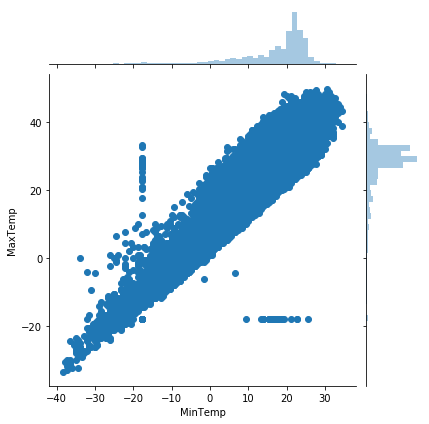

In [36]:
sns.jointplot(x='MinTemp',y='MaxTemp',data=dataset)

Vamos verificar a temperatura máxima média e, uma vez plotada, podemos observar que a temperatura máxima média está entre quase 25 e 35.

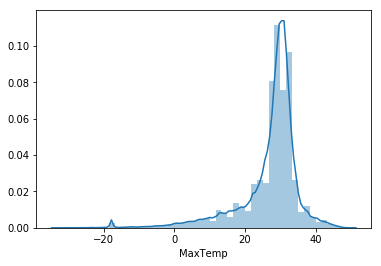

In [37]:
sns.distplot(dataset['MaxTemp'])

Nosso próximo passo é dividir os dados em "atributos" e "rótulos". 
Atributos são as variáveis independentes, enquanto rótulos são variáveis dependentes cujos valores devem ser previstos. Em nosso conjunto de dados, temos apenas duas colunas. Queremos prever o MaxTemp dependendo do MinTemp gravado. Portanto, nosso conjunto de atributos consistirá da coluna “MinTemp”, que é armazenada na variável X, e o rótulo será a coluna “MaxTemp”, que é armazenada na variável y.

In [38]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Em seguida, dividimos 80% dos dados no conjunto de treinamento, enquanto 20% dos dados são testados usando o código abaixo. 
A variável test_size é onde nós especificamos a proporção do conjunto de testes

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Depois de dividir os dados em conjuntos de treinamento e testes, finalmente, a hora é treinar nosso algoritmo. Para isso, precisamos importar a classe LinearRegression, instanciá-la e chamar o fit()método junto com nossos dados de treinamento.

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Como já discutimos, o modelo de regressão linear encontra basicamente o melhor valor para o intercepto e a inclinação, o que resulta em uma linha que melhor se ajusta aos dados. Para ver o valor do intercepto e do slop calculado pelo algoritmo de regressão linear para nosso conjunto de dados, execute o seguinte código.

In [11]:
#b0:
print(regressor.intercept_)
#b1:
print(regressor.coef_)

[10.68836189]
[[0.91888999]]


Isso significa que, para cada unidade de mudança na temperatura mínima, a variação na temperatura máxima é de cerca de 0,92%.

Agora que treinamos nosso algoritmo, é hora de fazer algumas previsões. Para fazer isso, usaremos nossos dados de teste e veremos com precisão com que nosso algoritmo prevê a pontuação percentual. Para fazer previsões nos dados de teste, execute o seguinte script:

In [12]:
y_pred = regressor.predict(X_test)

Agora compare os valores reais de saída X_test com os valores previstos, execute o seguinte script:

In [13]:
df = pd.DataFrame({'Real': y_test.flatten(), 'Predito': y_pred.flatten()})
df.head()

Real    Predito
0  30.000000  27.534678
1  28.888889  30.087151
2  28.333333  30.087151
3  33.333333  35.192095
4  38.888889  35.702590

Também podemos visualizar o resultado da comparação como um gráfico de barras usando o script abaixo:

Nota: Como o número de registros é enorme, para fins de representação, estou levando apenas 25 registros.


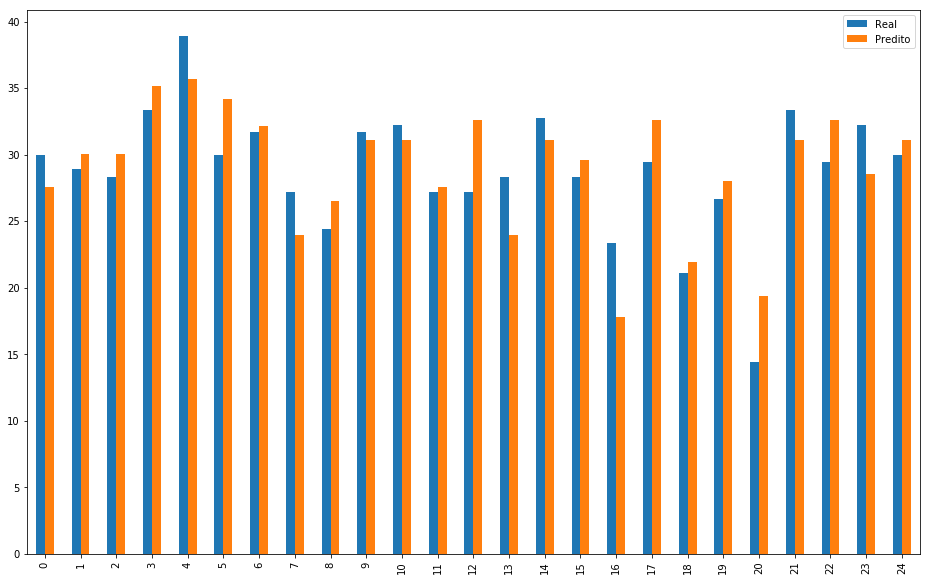

In [15]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

Embora nosso modelo não seja muito preciso, as porcentagens previstas são próximas às reais.

Vamos traçar nossa linha reta com os dados de teste:

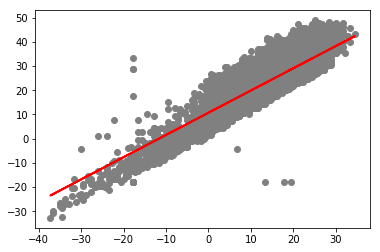

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Predições do nosso modelo

Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

predictions = regressor.predict(X_test)

plt.scatter(y_test,predictions)

**Histograma residual**

sns.distplot((y_test-predictions),bins=50);

## Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são ** funções de perda **, porque queremos minimizá-las.

Não precisamos realizar esses cálculos manualmente. A biblioteca Scikit-Learn vem com funções pré-construídas que podem ser usadas para descobrir esses valores para nós.

Vamos encontrar os valores para essas métricas usando nossos dados de teste.

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.177483117033067
Mean Squared Error: 17.11531078809625
Root Mean Squared Error: 4.1370654802766


Você pode ver que o valor do erro quadrático médio da raiz é 4.13, que é mais do que 10% do valor médio das porcentagens de toda a temperatura. Isso significa que nosso algoritmo não era muito preciso, mas ainda pode fazer previsões razoavelmente boas.

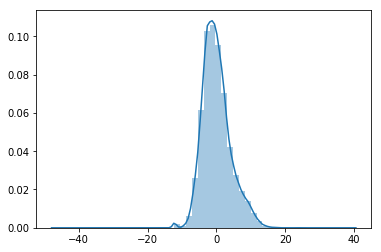

In [19]:
sns.distplot((y_test-y_pred),bins=50)

## Regressao Linear Multipla

Acabamos de realizar a regressão linear na seção acima, envolvendo duas variáveis. Quase todos os problemas do mundo real que você vai encontrar terão mais de duas variáveis. A regressão linear envolvendo múltiplas variáveis é chamada de “regressão linear múltipla” ou regressão linear multivariada. As etapas para realizar a regressão linear múltipla são quase semelhantes às da regressão linear simples. A diferença está na avaliação. Você pode usá-lo para descobrir qual fator tem o maior impacto sobre o resultado previsto e como variáveis diferentes se relacionam entre si.

Nesta seção, baixei o conjunto de dados de qualidade do vinho tinto. O conjunto de dados relacionado com as variantes vermelhas do vinho “ Vinho Verde ” Português . Devido a questões de privacidade e logística, apenas as variáveis físico-químicas (insumos) e sensoriais (a saída) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).

#### Data

Vamos levar em conta várias características de entrada, como acidez fixa, acidez volátil, ácido cítrico, açúcar residual, cloretos, dióxido de enxofre livre, dióxido de enxofre total, densidade, pH, sulfatos, álcool. Com base nessas características, vamos prever a qualidade do vinho.

Agora vamos começar nossa codificação:

importe todas as bibliotecas necessárias:

In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:
df_wine = pd.read_csv('winequality.csv')

In [13]:
df_wine.shape

(1599, 12)

In [14]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Vamos limpar nossos dados um pouco, Então, primeiro verifique quais são as colunas que contém os valores NaN:

In [15]:
df_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Uma vez que o código acima é executado, todas as colunas devem dar False, No caso de qualquer coluna você encontrar o resultado True, então remova todos os valores nulos daquela coluna usando o código abaixo.

In [16]:
df_wine = df_wine.fillna(method='ffill')

Nosso próximo passo é dividir os dados em "atributos" e "target". A variável X contém todos os atributos / recursos e a variável y contém o target.

In [17]:
X = df_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df_wine['quality'].values

Vamos verificar o valor médio da coluna "qualidade".

/home/pc/projects/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


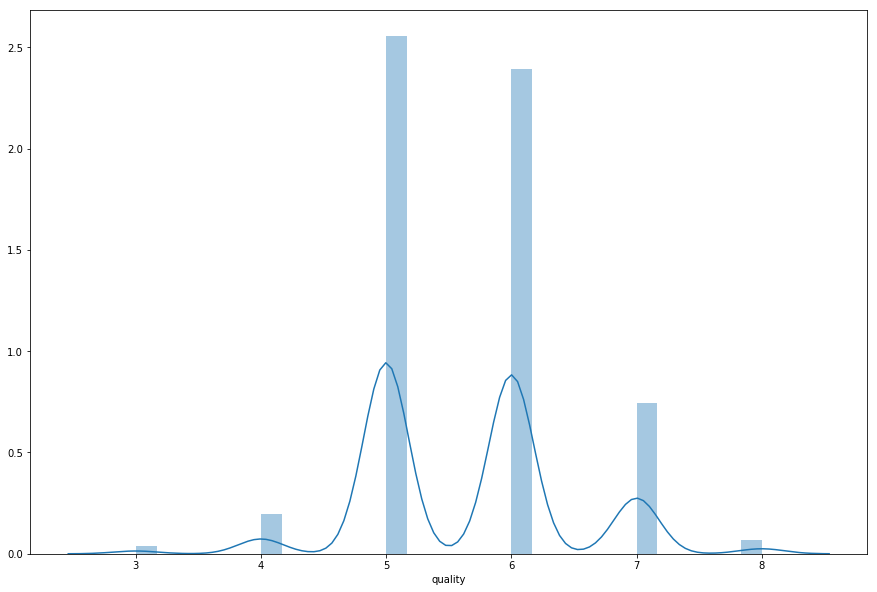

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_wine['quality'])

Como podemos observar que na maioria das vezes o valor é 5 ou 6.

Em seguida, dividimos 80% dos dados para o conjunto de treinamento e 20% dos dados para testar o conjunto usando o código abaixo.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora vamos treinar nosso modelo.

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Como dito anteriormente, no caso de regressão linear multivariada, o modelo de regressão deve encontrar os coeficientes mais ótimos para todos os atributos. Para ver quais coeficientes nosso modelo de regressão escolheu, execute o seguinte script:

In [21]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
fixed acidity            0.023085
volatile acidity        -1.001304
citric acid             -0.140821
residual sugar           0.006564
chlorides               -1.806503
free sulfur dioxide      0.005627
total sulfur dioxide    -0.003644
density                -10.351594
pH                      -0.393688
sulphates                0.841172
alcohol                  0.281890

    Isto significa que para um aumento unitário em “densidade”, há uma diminuição de 10,35 unidades na qualidade do vinho. Da mesma forma, uma redução de unidade em "Cloretos" resulta em um aumento de 1,8 unidades na qualidade do vinho. Podemos ver que o resto das características têm um efeito muito pequeno na qualidade do vinho.

Agora vamos fazer uma previsão nos dados de teste.

In [22]:
y_pred = regressor.predict(X_test)

Verifique a diferença entre o valor real e o valor previsto.

In [23]:
df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
df1 = df.head(25)

Agora vamos plotar a comparação dos valores reais e previstos

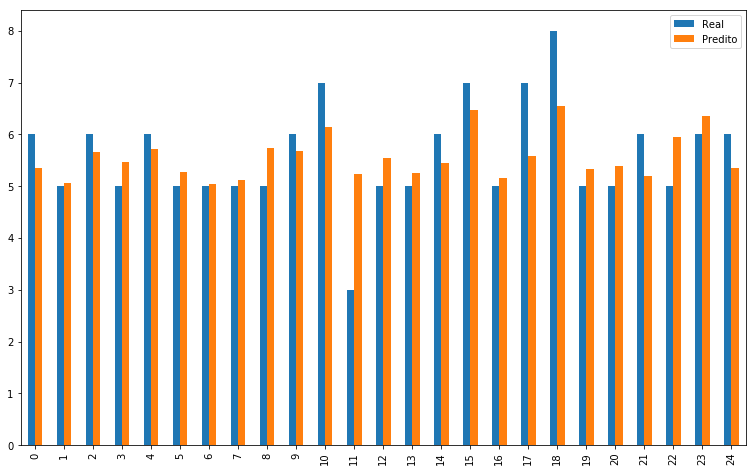

In [24]:
df1.plot(kind='bar',figsize=(13,8))
plt.show()

Como podemos observar aqui, nosso modelo retornou bons resultados de previsão.

O passo final é avaliar o desempenho do algoritmo. Faremos isso encontrando os valores para MAE , MSE e RMSE . Execute o seguinte script:

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5035304415524372
Mean Squared Error: 0.3900251439639549
Root Mean Squared Error: 0.6245199307980129


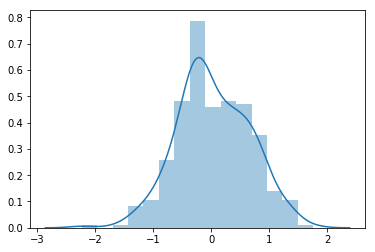

In [32]:
sns.distplot((y_test-y_pred),bins=15);

Isso significa que nosso algoritmo não é muito preciso, mas ainda pode fazer previsões razoavelmente boas.

Existem muitos fatores que podem ter contribuído para essa imprecisão, por exemplo:

Precisa de mais dados : precisamos ter uma quantidade enorme de dados para obter a melhor previsão possível. 
Suposições ruins : assumimos que esses dados têm um relacionamento linear, mas isso pode não ser o caso. Visualizar os dados pode ajudá-lo a determinar isso. 
Recursos ruins : os recursos que usamos podem não ter uma correlação suficientemente alta com os valores que estávamos tentando prever.

### Criterios da Regressao Linear

- Precisa haver Linearidade 
- Nao pode haver multicolinearidade entre as variaveis explicativas
- Normalidade dos residuos 
- Criterio de parcimonia